# Natural Language processing

Natural Language Processing is the technology used to aid computers to understand the human’s natural language like English. The objective of NLP is to read, understand, and make sense of the human languages.
NLP techniques rely on machine learning to derive meaning from human languages.

NLTK is a python package to handle text data.  

<br>

**Following elements are discussed in this document**
* Sentence tokenization
* Word tokenization
* Frequency distribution of words in  a document
* Stop words
* Stemming
* Normalization
* POS Tagger

<br>

At the end Sentiment analysis is performed on movie reviews dataset using Naivebayes theorm.
* TF-IDF is used for word vectorization 


In [0]:
#import nltk package
import nltk

## Tokenization
Tokenization is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentence or paragraph.

## Sentence Tokenization
Sentence tokenizer breaks text paragraph into sentences.

In [12]:
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
text="Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.The sky is pinkish-blue. You shouldn't eat cardboard"
tokenized_text=sent_tokenize(text)
print(tokenized_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.The sky is pinkish-blue.', "You shouldn't eat cardboard"]


## Word Tokenization
Word tokenizer breaks text paragraph into words.

In [4]:
from nltk.tokenize import word_tokenize

tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome.The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


## Frequency distribution of words

Let's check the word frequency in the document.

In [13]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 25 samples and 28 outcomes>


In [14]:
fdist.most_common(2)

[('is', 3), (',', 2)]

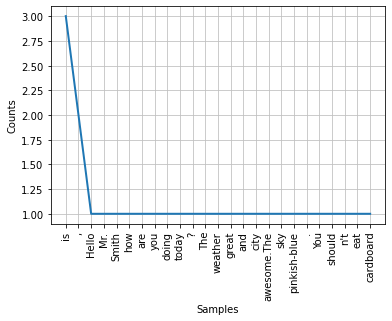

In [7]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

We see that most common words like "is" is repeted most of time which is expected. And the most common words will not give much information about the document. 

## Stopwords
Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.

In NLTK for removing stopwords, you need to create a list of stopwords and filter out your list of tokens from these words.

In [17]:
#let's list out stopwords available in NLTK package. 

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'his', 'your', "she's", 'been', 'once', "you'd", 'them', 'and', 'weren', 'does', 'between', "hadn't", 'up', 'of', 'she', 'hasn', "isn't", 'those', 'm', "weren't", 'nor', "mustn't", 'myself', 'both', 'did', 'during', 'have', 'same', 'ain', "didn't", 'theirs', 'on', "wasn't", 'few', 'can', 'too', 'in', 'as', 'yourself', 'himself', 'again', 'has', 'doesn', 'my', 'or', "needn't", 'the', 'themselves', 'while', 'to', 'who', 'whom', 'were', 'when', 'why', 'other', "mightn't", 'their', 'these', 'out', 'some', 've', 'don', 'yours', 'than', 'be', 'shouldn', 'more', 'won', 'him', 'itself', 'there', "shan't", 'here', 's', 'which', 'an', 'll', 'own', 'we', 'this', 'having', 'about', 'over', 'is', 'but', 'from', 'any', "hasn't", 'further', "don't", 'ourselves', 'down', 'wasn', "that'll", 'below', 'y', 'off', "aren't", 'a', 'how', 'herself', 'its', 'with', 'where', 'through', "it's"

In [18]:
#let's list the tokenized sentence and the filtered one

filtered_sent=[]
for w in tokenized_word:
  if w not in stop_words:
    filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome.The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']
Filterd Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome.The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']


### **Lexicon Normalization**
Lexicon normalization considers another type of noise in the text. For example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word.

### Stemming
Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connect".

In [10]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stemmed_words=[]
for w in filtered_sent:
  stemmed_words.append(ps.stem(w))
print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome.The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesome.th', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard']


### Lemmatization
Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

In [11]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
lem = WordNetLemmatizer()

stem = PorterStemmer()

word = "flying"

print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Lemmatized Word: fly
Stemmed Word: fli


In [0]:
lem = WordNetLemmatizer()
lemmitized_words=[]
for w in filtered_sent:
  lemmitized_words.append(lem.lemmatize(w))
print("Filtered Sentence:",filtered_sent)
print("lemmitizer Sentence:",lemmitized_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome.The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']
lemmitizer Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome.The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']


### POS Tagging
The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

In [0]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(lemmitized_words)
# check the link https://medium.com/@muddaprince456/categorizing-and-pos-tagging-with-nltk-python-28f2bc9312c3

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Hello', 'NNP'),
 ('Mr.', 'NNP'),
 ('Smith', 'NNP'),
 (',', ','),
 ('today', 'NN'),
 ('?', '.'),
 ('The', 'DT'),
 ('weather', 'NN'),
 ('great', 'JJ'),
 (',', ','),
 ('city', 'NN'),
 ('awesome.The', 'NN'),
 ('sky', 'JJ'),
 ('pinkish-blue', 'NN'),
 ('.', '.'),
 ('You', 'PRP'),
 ("n't", 'RB'),
 ('eat', 'VB'),
 ('cardboard', 'NN')]

### Sentiment Analysis
Nowadays companies want to understand, what went wrong with their latest products? What users and the general public think about the latest feature? You can quantify such information with reasonable accuracy using sentiment analysis.

Quantifying users content, idea, belief, and opinion is known as sentiment analysis. User's online post, blogs, tweets, feedback of product helps business people to the target audience and innovate in products and services. Sentiment analysis helps in understanding people in a better and more accurate way. It is not only limited to marketing, but it can also be utilized in politics, research, and security.

Human communication just not limited to words, it is more than words. Sentiments are combination words, tone, and writing style. As a data analyst, It is more important to understand our sentiments, what it really means?

There are mainly two approaches for performing sentiment analysis.

* Lexicon-based: count number of positive and negative words in given text and the larger count will be the sentiment of text.

* Machine learning based approach: Develop a classification model, which is trained using the pre-labeled dataset of positive, negative, and neutral.

Let's try to learn 2nd approach

### Text Classification
Text classification is one of the important tasks of text mining. It is a supervised approach. Identifying category or class of given text such as a blog, book, web page, news articles, and tweets. It has various application in today's computer world such as spam detection, task categorization in CRM services, categorizing products on E-retailer websites, classifying the content of websites for a search engine, sentiments of customer feedback, etc. In the next section, you will learn how you can do text classification in python.

![text classification](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1535125878/NLTK3_zwbdgg.png)

### Performing Sentiment Analysis using Text Classification

In [0]:
# Import pandas
import pandas as pd

### Loading Data
Till now, you have learned data pre-processing using NLTK. Now, you will learn Text Classification. You will perform Multi-Nomial Naive Bayes Classification using scikit-learn.

In the model the building part, you can use the "Sentiment Analysis of Movie, Reviews" dataset available on Kaggle. The dataset is a tab-separated file. Dataset has four columns PhraseId, SentenceId, Phrase, and Sentiment.

This data has 5 sentiment labels:
* 0 - negative 
* 1 - somewhat negative 
* 2 - neutral 
* 3 - somewhat positive 
* 4 - positive

Here, you can build a model to classify the type sentiments.
The dataset is available on Kaggle. You can download it from the following link: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data

In [0]:
data=pd.read_csv('train.tsv', sep='\t')

In [0]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [0]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

### Feature Generation using TF-IDF

The main issue with this Term Frequency is that it will give more weight to longer documents. Term frequency is basically the output of the BoW model.

IDF(Inverse Document Frequency) measures the amount of information a given word provides across the document. IDF is the logarithmically scaled inverse ratio of the number of documents that contain the word and the total number of documents.

![text classification](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1535125878/NLTK6_pwucct.png)

TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the document term matrix. It is the product of TF and IDF. Word with high tf-idf in a document, it is most of the times occurred in given documents and must be absent in the other documents. So the words must be a signature word.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

### Split train and test set (TF-IDF)
Let's split dataset by using function train_test_split(). You need to pass basically 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['Sentiment'], test_size=0.3, random_state=123)

### Model Building and Evaluation (TF-IDF)
Let's build the Text Classification Model using TF-IDF.

First, import the MultinomialNB module and create the Multinomial Naive Bayes classifier object using MultinomialNB() function.

Then, fit your model on a train set using fit() and perform prediction on the test set using predict().

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684


## Which is very low...